In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, LSTM, Dense

# Found out about this cool function from someone else's code:
# it automatically partitions a data set into training and validation data
from sklearn.model_selection import train_test_split

from toolbox import Preprocessing, VideoAnalysis, PredictionSample

In [2]:
dataFiles = Preprocessing.listDataFiles(excludeDataWithoutMovies=True)

propertyFiles = Preprocessing.loadRunData(dataFiles)
videos = Preprocessing.loadVideo(dataFiles)
matFiles = Preprocessing.loadMatFile(dataFiles)

In [38]:
# Import the data
fT = .3
sL = 10

scores = [VideoAnalysis.averageBrightness, VideoAnalysis.standardDeviation]

inputs, outputs = PredictionSample.fullPredictionSample(videos, propertyFiles, matFiles, scores, sampleLength=sL, forceEventThreshhold=fT)

In [39]:
# Partition the data
# 42 is just a random seed, and we'll take 10% of the data for validation
trainingInput, validationInput, trainingOutput, validationOutput = train_test_split(inputs[:,1:,:], outputs, test_size=0.1, random_state=1)
print(np.shape(trainingInput))
print(np.shape(validationInput))
print(sum(trainingOutput)/len(trainingOutput))
print(sum(validationOutput)/len(validationOutput))

(1630, 2, 10)
(182, 2, 10)
0.503680981595092
0.46703296703296704


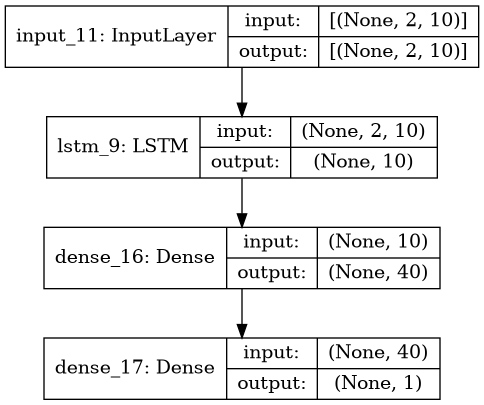

In [40]:
# Setup of the network
# Simple stacked network
model = keras.Sequential()

# Just three layers: an input, an LSTM, and the output, which should be either 1 or 0
model.add(Input(shape=(len(scores), sL)))
model.add(LSTM(sL, activation='tanh'))
model.add(Dense(40, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

In [49]:
#batchsize = 50
numEpochs = 1000
#cost = []

model.fit(trainingInput, trainingOutput, epochs=numEpochs, verbose=0)
model.evaluate(validationInput, validationOutput)

#for i in range(len(inputs)%batchsize):
#    cost.append(model.train_on_batch(inputs[i:min(i+batchsize,len(inputs)),1:,:], outputs[i:min(i+batchsize,len(inputs))])[0])
#plt.plot(cost)

6/6 [==============================] - 0s 806us/step - loss: 0.7008 - accuracy: 0.4725


[0.7008242011070251, 0.47252747416496277]

In [56]:
predict = model.predict_on_batch(validationInput)
print(np.array(list(zip(predict, validationOutput))))

[[array([0.51478547], dtype=float32) 1.0]
 [array([0.47413433], dtype=float32) 0.0]
 [array([0.51350725], dtype=float32) 0.0]
 [array([0.5147854], dtype=float32) 1.0]
 [array([0.51478547], dtype=float32) 1.0]
 [array([0.51478547], dtype=float32) 1.0]
 [array([0.51459324], dtype=float32) 1.0]
 [array([0.49916324], dtype=float32) 1.0]
 [array([0.5147854], dtype=float32) 1.0]
 [array([0.16868183], dtype=float32) 0.0]
 [array([0.5147183], dtype=float32) 0.0]
 [array([0.51461697], dtype=float32) 1.0]
 [array([0.5147194], dtype=float32) 0.0]
 [array([0.51478547], dtype=float32) 1.0]
 [array([0.51478547], dtype=float32) 0.0]
 [array([0.51478547], dtype=float32) 0.0]
 [array([0.51478547], dtype=float32) 1.0]
 [array([0.51478535], dtype=float32) 1.0]
 [array([0.49176276], dtype=float32) 0.0]
 [array([0.51478547], dtype=float32) 0.0]
 [array([0.5147854], dtype=float32) 0.0]
 [array([0.43230203], dtype=float32) 1.0]
 [array([0.4804487], dtype=float32) 0.0]
 [array([0.49157426], dtype=float32) 0.0

<ipython-input-56-9a7c006afb39>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array(list(zip(predict, validationOutput))))
